In [8]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [9]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob, sys
    files = glob.glob(os.path.join(dirin, fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    df["file"] = files[0].split("/")[-1]
    for i, file in enumerate(files[1:max_files]):
        print(".", end="")
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        # keep only meaningful fields
        dftmp["file"] = file.split("/")[-1]
        df = pd.concat([df, dftmp])
    print()
    return df

In [10]:
dirin = os.path.join("..", "..", "Data", "MuonsROI", "07-04-2020-VirtualShrouds")
prefix = "output*csv"

df = load_dataframe_from_files(dirin, prefix)

98

In [69]:
df_gby = df.groupby(["file", "eventnumber"]).energydeposition.sum().reset_index()
print("[Info] There are {} events".format(len(df_gby)))
print("[Info] There are {} non-zero events".format(len(df_gby[df_gby.energydeposition>0])))

[Info] There are 22636 events
[Info] There are 22439 non-zero events


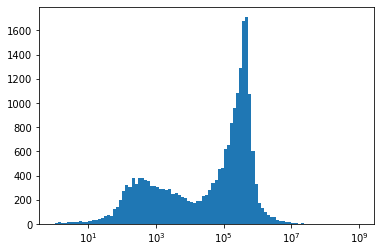

In [22]:
bins = np.logspace(0, 9, 100)
plt.hist(df_gby.energydeposition, bins=bins)
plt.xscale("log")
plt.show()

# Observations:
1. The energy spectrum per event is qualitatevely the same.
1. The number of events in this new run is much higher than the previous one. In the previous 2M muon simulation, there are `20 751` events in ROI (`1` of the have at least a non-zero deposit). In this 1M run, there are `22 636` (`22 439` of them non-zero).
1. Why there are so many events in ROI even if the run simulates 1M muons?

In [28]:
df["r"] = (df.x**2 + df.y**2)**.5

In [44]:
# Extract Ar41 de-excitation
df["file_event_key"] = df["file"] + " " + df["eventnumber"].astype(str)
events_ar41_list = df[(df.creatorprocess=="nCapture") & (df.PID==1000180410)].file_event_key.unique()

In [59]:
gammas_ar41_df = df[(df.PID==22) & (df.creatorprocess=="nCapture") & (df.file_event_key.isin(events_ar41_list))]

In [60]:
first_gammas_ar41 = gammas_ar41_df.groupby(["file_event_key", "tracknumber"]).first().reset_index()

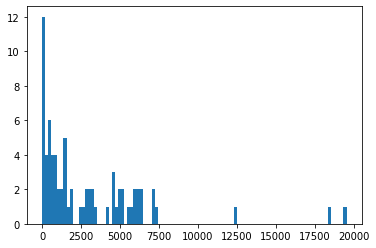

In [62]:
plt.hist(first_gammas_ar41.groupby("file_event_key").kineticenergy.sum(), bins=100)
plt.show()

In [64]:
cum_ke_gammas = first_gammas_ar41.groupby("file_event_key").kineticenergy.sum()

In [66]:
cum_ke_gammas[cum_ke_gammas>10000]

file_event_key
output3881417_part1.csv 378     19549.913870
output569191_part1.csv 6668     12491.024181
output9023907_part1.csv 5982    18516.377304
Name: kineticenergy, dtype: float64

In [68]:
df[(df.file=="output569191_part1.csv") & (df.eventnumber==6668)].energydeposition.sum()

89996.66431935997